 <img src="https://www.pucsp.br/sites/default/files/download/brasao-PUCSP-assinatura-principal-RGB.png" alt="Descrição da imagem" style="width: 10%;">

# Projeto Final: Análise e Predição da Satisfação de Clientes do Airbnb

### Grupo

| Nome | RA |
|---|---|
| Manoela Finotti | RA00319067 |
| Melissa Assis | RA00320501 |

### Objetivo

Nós, como uma empresa de consultoria, temos como objetivo analisar e prever as satisfações de clientes que se hospedaram em Airbnbs a fim de disponibilizar tais análises e previsões para agências de turismo. 

Temos um banco de dados com as informações necessarias para administrar nossos clientes (agências). A tabela 'Cliente' apresenta informações básicas destes, como nome, e-mail, endereço e método de pagamento. A tabela 'Pacote de Serviço' apresenta os pacotes disponíveis para as agências adquirirem, como o Ouro, Prata e Bronze, o valor e a quantidade de análises que a agência tem disponível por mês para solicitar. Já a tabela 'Análise', contém a cidade que o cliente tem interesse, a data e a quantidade de análises que foram feitas de fato.

Além disso, temos o dataset com os dados dos apartamentos/ casas de Airbnb, como o preço, tipo de quarto, capacidade de pessoas, satisfação dos clientes, entre outros... Tais informações serão importantes para uma análise exploratória dos dados, identificando o que mais influencia ou não na satisfação dos clientes, fazendo, assim, uma previsão com Machine Learning.

Dessa forma, utilizamos o dataset para prever a satisfação dos clientes de acordo com as características do Airbnb. Passamos essa análise para as agências de viagens (de acordo com o controle no banco de dados), que está interessada no resultado, para apresentar melhores opções de Airbnbs aos seus clientes (hóspedes).

### Importando Bibliotecas

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mysql.connector

### Carregando o Dataset

In [24]:
df = pd.read_csv('dataset.csv')

In [25]:
df.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index  
0                    6.846473  
1                   58.342928  
2                    6.646700  
3                   60.973565  
4                   56.811677

### Banco de Dados

#### Modelo Conceitual

<img src = 'img\modelo_conceitual.png' width='500'  height='400'>

#### Modelo Lógico

<img src = 'img\modelo_lógico.png' width='500'  height='400'>

#### Modelo Físico

CREATE TABLE Pacote de Serviço 
( 
 ID_pacote INT PRIMARY KEY,  
 Nome VARCHAR(5) NOT NULL,  
 Valor INT NOT NULL,  
 Analises/mes INT NOT NULL,  
); 

CREATE TABLE Análise 
( 
 ID_analise INT PRIMARY KEY,  
 Cidade VARCHAR(10) NOT NULL,  
 Data da analise DATE NOT NULL,  
 Quantidade de analises INT NOT NULL,  
 idCliente INT,  
); 

CREATE TABLE Cliente 
( 
 ID_cliente INT PRIMARY KEY,  
 Nome VARCHAR(30) NOT NULL,  
 Endereço VARCHAR(50) NOT NULL,  
 Email VARCHAR(50) NOT NULL',  
 Método de pagamento VARCHAR(10) NOT NULL,  
 idPacote de Serviço INT,  
); 

ALTER TABLE Análise ADD FOREIGN KEY(idCliente) REFERENCES Cliente (idCliente)
ALTER TABLE Cliente ADD FOREIGN KEY(idPacote de Serviço) REFERENCES Pacote de Serviço (idPacote de Serviço)

#### Queries

In [ ]:
#criando uma função para conectar o banco de dados, abrir o cursor e executar as querys. Após isso feito, o cursor é fechado
def executar_query(query):
    con = mysql.connector.connect(user='sql10625864', password='9TIKAMFHsn',
                              host='sql10.freemysqlhosting.net',
                              database='sql10625864')
    cursor = con.cursor()
    cursor.execute(query)
    res = cursor.fetchall()
    
    if res:
        for row in res:
            return res
    else:
        return None    
    
    cursor.close()
    con.close()

##### Visualizando as tabelas

In [107]:
#tabela Cliente
cliente = ("""SELECT * FROM Cliente""")
executar_query(cliente)

ProgrammingError: 1045 (28000): Access denied for user 'sql10625864'@'189.40.88.48' (using password: YES)

(O banco de dados expirou, portanto ao rodar as células das queries dará erro. Abaixo está disponível o print da tabela Cliente, que não foi possível mostrar.)

<img src = 'img\tabela_cliente.png'>

In [ ]:
#tabela Pacote_serviço
pacotes = ("""SELECT * FROM Pacote_serviço""")
executar_query(pacotes)

[(1, 'Bronze', 5000, 5), (2, 'Prata', 10000, 10), (3, 'Ouro', 15000, 15)]

In [ ]:
#tabela Análise
analises = ("""SELECT * FROM Análise""")
executar_query(analises)

[(1, 'Amsterdam', datetime.date(2023, 3, 1), 3, 1),
 (2, 'Atenas', datetime.date(2022, 12, 1), 13, 2),
 (3, 'Barcelona', datetime.date(2022, 5, 1), 10, 3),
 (4, 'Budapeste', datetime.date(2023, 1, 1), 8, 4),
 (5, 'Lisboa', datetime.date(2022, 10, 1), 4, 5),
 (6, 'Paris', datetime.date(2022, 11, 1), 9, 6),
 (7, 'Roma', datetime.date(2023, 2, 1), 15, 7),
 (8, 'Viena', datetime.date(2023, 4, 1), 8, 8),
 (9, 'Amsterdam', datetime.date(2023, 6, 1), 4, 9),
 (10, 'Atenas', datetime.date(2022, 7, 1), 15, 10),
 (11, 'Barcelona', datetime.date(2021, 10, 1), 5, 1),
 (12, 'Berlim', datetime.date(2021, 6, 1), 11, 2),
 (13, 'Budapeste', datetime.date(2021, 5, 1), 7, 3),
 (14, 'Lisboa', datetime.date(2022, 4, 1), 6, 4),
 (15, 'Paris', datetime.date(2021, 9, 1), 1, 5),
 (16, 'Roma', datetime.date(2021, 2, 1), 0, 6),
 (17, 'Viena', datetime.date(2020, 5, 1), 10, 7),
 (18, 'Amsterdam', datetime.date(2021, 7, 1), 10, 8),
 (19, 'Atenas', datetime.date(2020, 3, 1), 2, 9),
 (20, 'Barcelona', datetime.date(2

##### Query 1: Quantas análises a agência Voe solicitou em Março de 2023?

In [ ]:
query1 = ("""SELECT Análise.Quantidade_análise
        FROM Análise
        JOIN Cliente on Análise.ID_cliente_fk = Cliente.ID_cliente
        WHERE Nome = 'Voe'
        AND MONTH(Análise.Data_análise) = 3
        AND YEAR(Análise.Data_análise) = 2023
        """)
res = executar_query(query1)
if res:
    analise = res[0][0]
    print('A agência Voe solicitou {} análises em Março de 2023'.format(analise))
else:   
    print('Sem reusltados')

A agência Voe solicitou 3 análises em Março de 2023


##### Query 2: Quantas análises o cliente Continental pediu em dezembro de 2022?

In [ ]:
query2 = ("""SELECT Análise.Quantidade_análise
        FROM Análise
        JOIN Cliente on Análise.ID_cliente_fk = Cliente.ID_cliente
        WHERE ID_cliente = 2
        AND MONTH(Análise.Data_análise) = 12
        AND YEAR(Análise.Data_análise) = 2022
        """)
res = executar_query(query2)
if res:
    analise = res[0][0]
    print('O cliente Continental pediu {} análises em dezembro de 2022'.format(analise))
else:   
    print('Sem reusltados')

O cliente Continental pediu 13 análises em dezembro de 2022


##### Query 3: Qual foi a cidade analisada pelo cliente com ID=10 em Julho de 2022? Qual foi o cliente?

In [ ]:
query3 = ("""SELECT Análise.Cidade, Cliente.Nome 
        FROM Análise
        JOIN Cliente on Análise.ID_cliente_fk = Cliente.ID_cliente
        WHERE ID_cliente = 10
        AND MONTH(Análise.Data_análise) = 07
        AND YEAR(Análise.Data_análise) = 2022
        """)
res = executar_query(query3)
if res:
    cidade = res[0][0]
    cliente = res[0][1]
    print('A cidade analisada pelo cliente com ID = 10 ({}) em Julho de 2022 foi {}'.format(cidade, cliente))
else:   
    print('Sem reusltados')

A cidade analisada pelo cliente com ID = 10 (Atenas) em Julho de 2022 foi Santa Viagem


##### Query 4: Quantas vezes o método de pagamento 'Crédito' foi usado?

In [ ]:
query4 = ("""SELECT Método_pagamento, COUNT(*)
        FROM Cliente
        WHERE Método_pagamento = "Crédito"
        """)
res = executar_query(query4)
if res:
    credito = res[0][1]
    print('O método de pagamento Crédito foi usado {} vezes.'.format(credito))
else:   
    print('Sem reusltados')

O método de pagamento Crédito foi usado 5 vezes.


##### Query 5: Qual é o endereço do cliente com ID=9?

In [ ]:
query5 = ("""SELECT Endereço
        FROM Cliente
        WHERE ID_cliente = 9
        """)
res = executar_query(query5)
if res:
    endereco = res[0][0]
    print('O endereço do cliente com ID = 9 é {}.'.format(endereco))
else:   
    print('Sem reusltados')

O endereço do cliente com ID = 9 é Rua da Amazonia 98.


##### Query 6: Qual é o email de contato do cliente Libert?

In [ ]:
query6 = ("""SELECT Email
        FROM Cliente
        WHERE Nome = "Libert"
        """)
res = executar_query(query6)
if res:
    email = res[0][0]
    print('O e-mail de contato do cliente Libert é {}.'.format(email))
else:   
    print('Sem reusltados')

O e-mail de contato do cliente Libert é libert@email.com.


##### Query 7: Qual é o Pacote utilizado pelo cliente com ID=3?

In [ ]:
query7 = ("""SELECT Pacote_serviço.Nome
        FROM Pacote_serviço
        JOIN Cliente on Pacote_serviço.ID_pacote = Cliente.ID_pacote_fk
        WHERE ID_cliente = 3
        """)
res = executar_query(query7)
if res:
    pacote = res[0][0]
    print('O Pacote de serviço utilizado pelo cliente com ID = 3 é {}.'.format(pacote))
else:   
    print('Sem reusltados')

O Pacote de serviço utilizado pelo cliente com ID = 3 é Prata.


##### Query 8: Quantas análises o cliente Gira Mundo tinha disponível por mês e quantas ele solicitou no mês de julho em 2021?

In [ ]:
query8 = ("""SELECT Pacote_serviço.Analises_mes, Análise.Quantidade_análise, Análise.Data_análise
        FROM Pacote_serviço
        JOIN Cliente on Pacote_serviço.ID_pacote = Cliente.ID_pacote_fk
        JOIN Análise on Cliente.ID_cliente = Análise.ID_cliente_fk
        WHERE Cliente.Nome = "Gira Mundo"
        AND MONTH(Análise.Data_análise) = 7
        AND YEAR(Análise.Data_análise) = 2021
        """)
res = executar_query(query8)
if res:
    analises_disponiveis = res[0][0]
    analises_feitas = res[0][0]
    data = res[0][2]
    print('O cliente Gira Mundo tem {} análises por mês e fez {} análises na data {}'.format(analises_disponiveis,analises_feitas, data))
else:   
    print('Sem reusltados')

O cliente Gira Mundo tem 10 análises por mês e fez 10 análises na data 2021-07-01


##### Query 9: Quantas análises foram feitas para a cidade de Amsterdã?

In [ ]:
query9 = ("""SELECT SUM(Quantidade_análise)
        FROM Análise
        WHERE Cidade = "Amsterdam"
        """)
res = executar_query(query9)
if res:
    analises = res[0][0]
    print('Foram feitas {} análises para a cidade de Amsterdã'.format(analises))
else:   
    print('Sem reusltados')

Foram feitas 17 análises para a cidade de Amsterdã


##### Query 10: Quais são os clientes que tem o Pacote Ouro?

In [ ]:
query10 = ("""SELECT Cliente.Nome
        FROM Cliente
        JOIN Pacote_serviço on Cliente.ID_pacote_fk = Pacote_serviço.ID_pacote
        WHERE Pacote_serviço.Nome = "Ouro"
        """)
res = executar_query(query10)
if res:
    clientes = [cliente[0] for cliente in res]
    print('Há {} clientes no Pacote Ouro'.format(clientes))
else:   
    print('Sem reusltados')

Há ['Continental', 'Global', 'Libert', 'Santa Viagem'] clientes no Pacote Ouro


### EDA - Exploratory Data Analysis

#### Análise Exploratória

In [26]:
#tamanho do dataframe
df.shape

(41714, 19)

In [27]:
#colunas
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [28]:
#informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [29]:
#há valores ausentes?
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [30]:
#resumo estatístico
df.describe()

Price  Person Capacity  Multiple Rooms      Business  \
count  41714.000000     41714.000000    41714.000000  41714.000000   
mean     260.094423         3.237235        0.295273      0.341180   
std      279.408493         1.299459        0.456171      0.474112   
min       34.779339         2.000000        0.000000      0.000000   
25%      144.016085         2.000000        0.000000      0.000000   
50%      203.819274         3.000000        0.000000      0.000000   
75%      297.373358         4.000000        1.000000      1.000000   
max    18545.450285         6.000000        1.000000      1.000000   

       Cleanliness Rating  Guest Satisfaction      Bedrooms  City Center (km)  \
count        41714.000000        41714.000000  41714.000000      41714.000000   
mean             9.442274           93.103179      1.165939          2.679792   
std              0.889173            8.141745      0.638157          1.996684   
min              2.000000           20.000000      0.000000          0.015045   
25%              9.000000           90.000000      1.000000          1.275913   
50%             10.000000           95.000000      1.000000          2.253237   
75%             10.000000           98.000000      1.000000          3.584489   
max             10.000000          100.000000     10.000000         25.284557   

       Metro Distance (km)  Attraction Index  Normalised Attraction Index  \
count         41714.000000      41714.000000                 41714.000000   
mean              0.603921        293.905990                    11.719658   
std               0.706206        235.750055                     8.379161   
min               0.002301         15.152201                     0.926301   
25%               0.236693        124.371614                     5.510735   
50%               0.391220        228.920599                     9.951086   
75%               0.678702        394.000201                    15.467009   
max              14.273577       4513.563486                   100.000000   

       Restraunt Index  Normalised Restraunt Index  
count     41714.000000                41714.000000  
mean        626.692618                   25.553590  
std         520.644720                   18.484572  
min          19.576924                    0.592757  
25%         210.459574                   11.132052  
50%         519.583509                   21.814414  
75%         860.708156                   36.821356  
max        6696.156772                  100.000000

In [31]:
#adicionando uma nova coluna para classificação da satisfação do cliente (D: menor indice de satisfação,  A: Maior indice de satisfação) 
intervalo = [20, 40, 60, 80, 100]
classes = ['D', 'C', 'B', 'A']
df['Guest Satisfaction_class'] = pd.cut(df['Guest Satisfaction'],
    bins=intervalo, labels=classes, right=True)

In [32]:
#analise das quantidades de cada classe
df['Guest Satisfaction_class'].value_counts()

Guest Satisfaction_class
A    38619
B     2566
C      369
D       69
Name: count, dtype: int64

In [33]:
#removendo valores nulos
df.dropna(inplace=True)

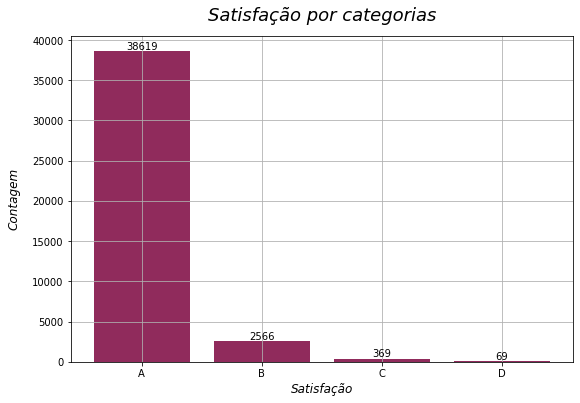

In [34]:
#gráfico para visualização da satisfação por categorias
fig = plt.subplots(figsize = (9,6))
contagem_categorias = df['Guest Satisfaction_class'].value_counts()
plt.bar(contagem_categorias.index, contagem_categorias.values, color = "#902B5C")
for i, count in enumerate(contagem_categorias.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Satisfação por categorias', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Satisfação', fontsize = 12, style = "italic")
plt.ylabel('Contagem', fontsize = 12, style = "italic", labelpad = 12)
plt.grid()
plt.savefig("img\satisfacao_categorias.png", dpi=300, facecolor='white', bbox_inches='tight')

In [35]:
df.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index Guest Satisfaction_class  
0                    6.846473                        A  
1                   58.342928                        A  
2                    6.646700                        A  
3                   60.973565                        A  
4                   56.811677                        A

In [36]:
df.shape

(41623, 20)

#### Histogramas

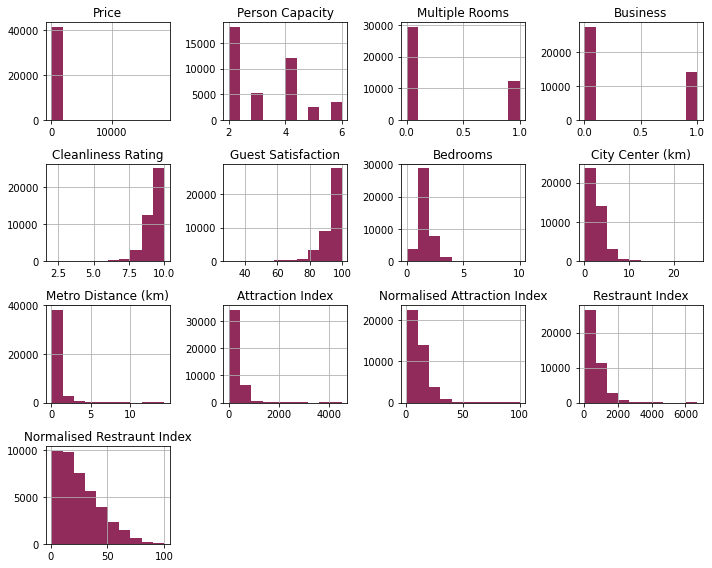

In [37]:
#visualização da distribuição dos dados numéricos
df.hist(figsize=(10, 8), color = "#902B5C")
plt.tight_layout()
plt.savefig("img\histogramas.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Correlação entre as Variáveis

In [38]:
#removendo colunas categóricas
data = df.drop(columns = ['City', 'Day', 'Room Type', 'Guest Satisfaction_class'])

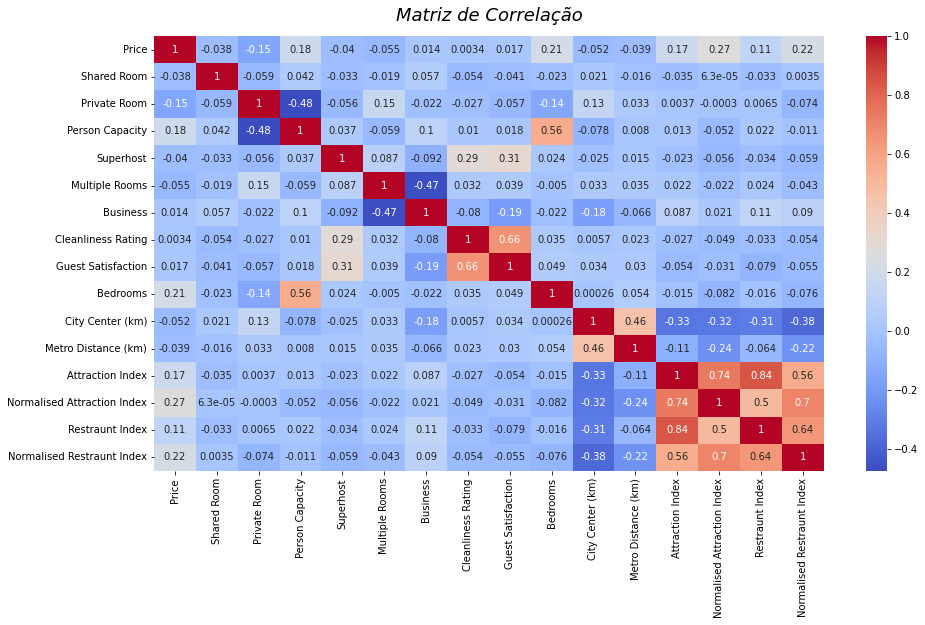

In [39]:
#gráfico de calor de correlação
correlacao = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.savefig("img\matriz_corr.png", dpi=300, facecolor='white', bbox_inches='tight')

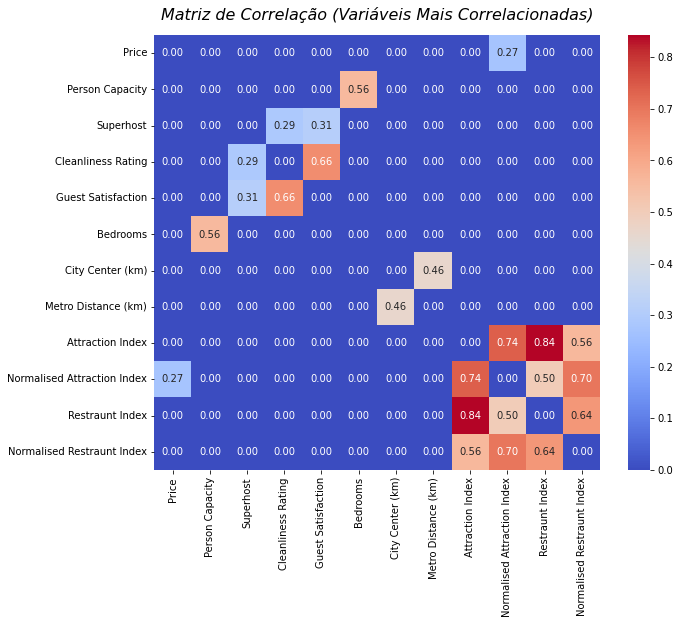

In [40]:
#gráfico de calor de correlação > 0.25

correlacao = data.corr()

variaveis_filtradas = correlacao[(correlacao > 0.25)]
np.fill_diagonal(variaveis_filtradas.values, np.nan)

variaveis_filtradas = variaveis_filtradas.dropna(how='all', axis=0).dropna(how='all', axis=1)
variaveis_filtradas = variaveis_filtradas.fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(variaveis_filtradas, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação (Variáveis Mais Correlacionadas)",  fontsize = 16, style = "italic", loc = "center", pad = 15)
plt.savefig("img\matriz_corr_var.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Análise das Categorias

In [41]:
df.head()

City       Price      Day     Room Type  Shared Room  Private Room  \
0  Amsterdam  194.033698  Weekday  Private room        False          True   
1  Amsterdam  344.245776  Weekday  Private room        False          True   
2  Amsterdam  264.101422  Weekday  Private room        False          True   
3  Amsterdam  433.529398  Weekday  Private room        False          True   
4  Amsterdam  485.552926  Weekday  Private room        False          True   

   Person Capacity  Superhost  Multiple Rooms  Business  Cleanliness Rating  \
0              2.0      False               1         0                10.0   
1              4.0      False               0         0                 8.0   
2              2.0      False               0         1                 9.0   
3              4.0      False               0         1                 9.0   
4              2.0       True               0         0                10.0   

   Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                93.0         1          5.022964             2.539380   
1                85.0         1          0.488389             0.239404   
2                87.0         1          5.748312             3.651621   
3                90.0         2          0.384862             0.439876   
4                98.0         1          0.544738             0.318693   

   Attraction Index  Normalised Attraction Index  Restraunt Index  \
0         78.690379                     4.166708        98.253896   
1        631.176378                    33.421209       837.280757   
2         75.275877                     3.985908        95.386955   
3        493.272534                    26.119108       875.033098   
4        552.830324                    29.272733       815.305740   

   Normalised Restraunt Index Guest Satisfaction_class  
0                    6.846473                        A  
1                   58.342928                        A  
2                    6.646700                        A  
3                   60.973565                        A  
4                   56.811677                        A

##### Centro da Cidade x Distância do Metrô

In [42]:
fig = px.scatter(df, 
                 x='City Center (km)', 
                 y='Metro Distance (km)', 
                 color='Guest Satisfaction_class', 
                 size='Guest Satisfaction')
fig.update_layout(
    title={
        'text': 'Satisfação do Cliente por: Distância do Centro (km) x Distância do Metrô (km)',
        'font': {
            'size': 16 
        },
        'x': 0.5
    })
fig.write_html('img\centro_metro.html', include_plotlyjs='cdn')
fig.show()

##### Índice de Atração x Índice de Restaurante

In [43]:
fig = px.scatter(df, x='Normalised Attraction Index', y='Normalised Restraunt Index', color='Guest Satisfaction_class', size='Guest Satisfaction')
fig.update_layout(
    title={
        'text': 'Satisfação do Cliente por: Índice de atração x Índice de Restaurante',
        'font': {
            'size': 16 
        },
        'x': 0.5,
    }
)

fig.write_html(r'img\atracao_restaurante.html', include_plotlyjs='cdn')
fig.show()

##### Satisfação x Tipo de Quarto

In [44]:
satisfacao_quarto = df[['Guest Satisfaction', 'Room Type']].groupby('Room Type').mean().reset_index().sort_values('Guest Satisfaction', ascending = False)
satisfacao_quarto

Room Type  Guest Satisfaction
0  Entire home/apt           93.589916
1     Private room           92.642143
2      Shared room           89.829114

In [45]:
color_map = {
    'Entire home/apt': "#341B32",
    'Private room': "#823a58", 
    'Shared room': "#ba5a5d"}

In [47]:
fig = px.box(df, x="Room Type", y="Guest Satisfaction", color = 'Room Type', category_orders = {'Room Type': satisfacao_quarto['Room Type']}, color_discrete_map=color_map)
fig.update_layout(
    title={
        'text': 'Satisfação do Cliente por Tipo de Quarto',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Satisfação x Superhost

In [159]:
satisfacao_superhost = df[['Guest Satisfaction', 'Superhost']].groupby('Superhost').mean().reset_index().sort_values('Guest Satisfaction', ascending = False)
satisfacao_superhost

Superhost  Guest Satisfaction
1       True           96.937462
0      False           91.833611

In [169]:
color_map = {
    1: "#341B32",
    0: "#823a58"}

In [170]:
fig = px.box(df, x="Superhost", y="Guest Satisfaction", color = 'Superhost', category_orders = {'Superhost': satisfacao_superhost['Superhost']}, color_discrete_map=color_map)
fig.update_layout(
    title={
        'text': 'Relação entre Satisfação do Cliente e a Condição de Superhost',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Satisfação x Limpeza

In [81]:
satisfacao_limpeza = df[['Guest Satisfaction_class', 'Cleanliness Rating']].groupby('Guest Satisfaction_class').mean().reset_index()
satisfacao_limpeza

Guest Satisfaction_class  Cleanliness Rating
0                        D            5.057971
1                        C            7.097561
2                        B            8.310990
3                        A            9.561511

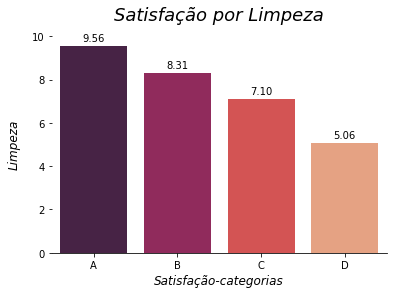

In [82]:
ordem = ['A', 'B', 'C', 'D']
satisfacao_limpeza['Guest Satisfaction_class'] = pd.Categorical(satisfacao_limpeza['Guest Satisfaction_class'], categories=ordem, ordered=True)
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(data = satisfacao_limpeza, x = 'Guest Satisfaction_class', y = 'Cleanliness Rating', palette = 'rocket')
plt.title('Satisfação por Limpeza', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Satisfação-categorias', fontsize = 12, style = "italic")
plt.ylabel('Limpeza', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.2f', label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)
plt.savefig("img\satisfacao_limpeza.png", dpi=300, facecolor='white', bbox_inches='tight')

##### Satisfação x Preço

In [83]:
satisfacao_preco = df[['Guest Satisfaction_class', 'Price']].groupby('Guest Satisfaction_class').mean().reset_index()
satisfacao_preco

Guest Satisfaction_class       Price
0                        D  262.487119
1                        C  286.034328
2                        B  258.814817
3                        A  259.955475

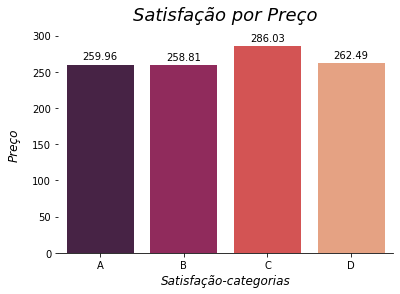

In [84]:
ordem = ['A', 'B', 'C', 'D']
satisfacao_preco['Guest Satisfaction_class'] = pd.Categorical(satisfacao_preco['Guest Satisfaction_class'], categories=ordem, ordered=True)
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(data = satisfacao_preco, x = 'Guest Satisfaction_class', y = 'Price', palette = 'rocket')
plt.title('Satisfação por Preço', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Satisfação-categorias', fontsize = 12, style = "italic")
plt.ylabel('Preço', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=10,fmt='%.2f', label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)
plt.savefig("img\satisfacao_preco.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Machine Learning

##### Carregando as bibliotecas

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from joblib import dump

In [86]:
#variáveis preditoras
X = df.drop(['Guest Satisfaction_class', 'Guest Satisfaction'], axis = 1)

In [87]:
X.shape

(41623, 18)

In [88]:
#variável-alvo
y = df['Guest Satisfaction_class']

In [89]:
y.shape

(41623,)

In [90]:
#dividindo os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [91]:
#colunas numéricas
numeric_cols = X_train.select_dtypes(include=['float', 'int']).columns
numeric_cols

Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [92]:
#colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
categorical_cols

Index(['City', 'Day', 'Room Type', 'Shared Room', 'Private Room', 'Superhost'], dtype='object')

In [93]:
#padronização dos valores numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [94]:
#transformando colunas categóricas em numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder())])

In [95]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['City', 'Day', 'Room Type', 'Shared Room', 'Private Room', 'Superhost'], dtype='object'))])

In [96]:
#ajustando os dados de treinamento
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [97]:
X_train_preprocessed

array([[ 0.3355795 ,  1.35350203, -0.64616894, ...,  0.        ,
         1.        ,  0.        ],
       [-0.40554215, -0.95195641, -0.64616894, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21956218,  0.58501588, -0.64616894, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31747881,  0.58501588, -0.64616894, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05810735,  2.12198818, -0.64616894, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15939638, -0.95195641, -0.64616894, ...,  1.        ,
         1.        ,  0.        ]])

In [98]:
#ajustando os dados de teste
X_test_preprocessed = preprocessor.transform(X_test)

In [99]:
X_test_preprocessed

array([[-0.56366772, -0.95195641, -0.64616894, ...,  1.        ,
         1.        ,  0.        ],
       [-0.6502621 , -0.18347027, -0.64616894, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29810657, -0.95195641,  1.5475829 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.41886857,  0.58501588, -0.64616894, ...,  0.        ,
         0.        ,  1.        ],
       [-0.21254583, -0.95195641, -0.64616894, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27194257, -0.95195641,  1.5475829 , ...,  1.        ,
         0.        ,  1.        ]])

In [100]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'A': 38619, 'B': 2566, 'C': 369, 'D': 69})


In [101]:
#para balancear os dados utilizando Oversampling
sm = SMOTE(random_state=42)

In [102]:
#balanceando os dados de treinamento
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_preprocessed, y_train)
print('Resampled dataset shape %s' % Counter(y_train_balanced))

Resampled dataset shape Counter({'A': 27033, 'B': 27033, 'D': 27033, 'C': 27033})


In [103]:
#balanceando os dados de teste
X_test_balanced, y_test_balanced = sm.fit_resample(X_test_preprocessed, y_test)
print('Resampled dataset shape %s' % Counter(y_test_balanced))

Resampled dataset shape Counter({'A': 11586, 'C': 11586, 'B': 11586, 'D': 11586})


In [104]:
#função para o mapa da matriz de confusão
def confusion_matrix_plot(clf, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    fig, axs = plt.subplots(figsize=(8,8))
    acc = round(accuracy_score(y_true, y_pred), 2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    axs.set_title('{} - acc {}'.format(title, acc))
    disp.plot(ax=axs, cmap='Blues', colorbar=False)

##### KNN

In [105]:
knn = KNeighborsClassifier()

*Sem Oversampling*

In [106]:
knn.fit(X_train_preprocessed, y_train)

KNeighborsClassifier()

In [107]:
knn_preds = knn.predict(X_test_preprocessed)

In [108]:
knn_accuracy = accuracy_score(y_test, knn_preds)

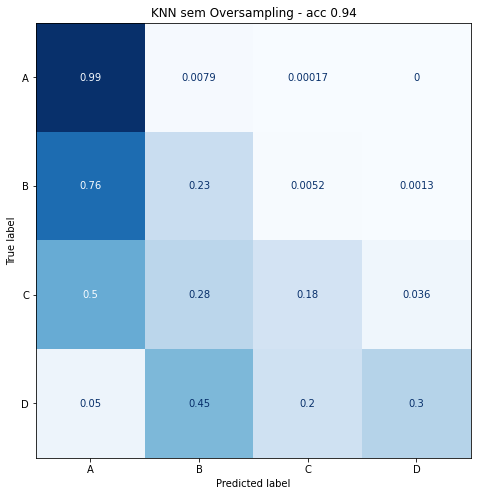

In [109]:
confusion_matrix_plot(knn, y_test, knn_preds, 'KNN sem Oversampling')
plt.savefig("img\matriz_knn.png", dpi=300, facecolor='white', bbox_inches='tight')

In [110]:
print('Classification Report do KNN sem Oversampling:')
print(classification_report(y_test, knn_preds))

Classification Report do KNN sem Oversampling:
              precision    recall  f1-score   support

           A       0.95      0.99      0.97     11586
           B       0.58      0.23      0.33       770
           C       0.67      0.18      0.28       111
           D       0.55      0.30      0.39        20

    accuracy                           0.94     12487
   macro avg       0.68      0.43      0.49     12487
weighted avg       0.92      0.94      0.92     12487



*Com Oversampling*

In [111]:
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [112]:
os_knn_preds = knn.predict(X_test_balanced)

In [113]:
os_knn_accuracy = accuracy_score(y_test_balanced, os_knn_preds)

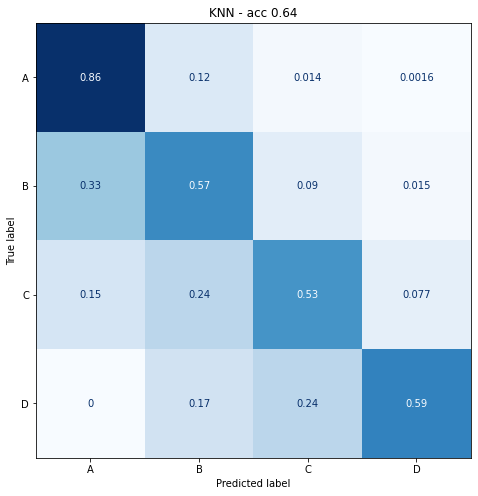

In [114]:
confusion_matrix_plot(knn, y_test_balanced, os_knn_preds, 'KNN')
plt.savefig("img\matriz_knn_os.png", dpi=300, facecolor='white', bbox_inches='tight')

In [115]:
print('Classification Report do KNN com Oversampling:')
print(classification_report(y_test_balanced, os_knn_preds))

Classification Report do KNN com Oversampling:


              precision    recall  f1-score   support

           A       0.64      0.86      0.74     11586
           B       0.52      0.57      0.54     11586
           C       0.60      0.53      0.57     11586
           D       0.86      0.59      0.70     11586

    accuracy                           0.64     46344
   macro avg       0.66      0.64      0.64     46344
weighted avg       0.66      0.64      0.64     46344



In [116]:
dump(knn, 'modelo_knn.joblib')

['modelo_knn.joblib']

##### SVC

In [59]:
svc = SVC()

*Sem Oversampling*

In [60]:
svc.fit(X_train_preprocessed, y_train)

SVC()

In [61]:
svc_preds = svc.predict(X_test_preprocessed)

In [62]:
svc_accuracy = accuracy_score(y_test, svc_preds)

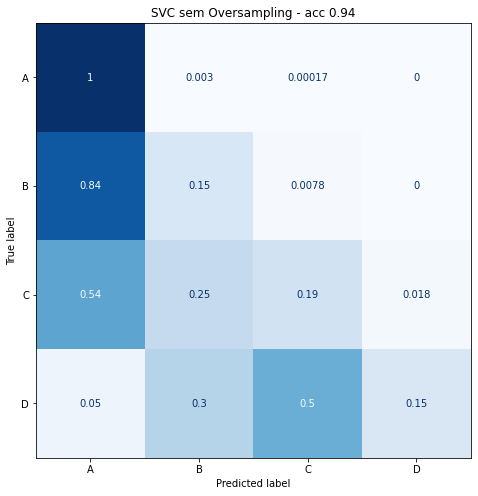

In [63]:
confusion_matrix_plot(svc, y_test, svc_preds, 'SVC sem Oversampling')
plt.savefig("img\matriz_svc.png", dpi=300, facecolor='white', bbox_inches='tight')

In [64]:
print('Classification Report do SVC sem Oversampling:')
print(classification_report(y_test, svc_preds))

Classification Report do SVC sem Oversampling:
              precision    recall  f1-score   support

           A       0.94      1.00      0.97     11586
           B       0.63      0.15      0.24       770
           C       0.54      0.19      0.28       111
           D       0.60      0.15      0.24        20

    accuracy                           0.94     12487
   macro avg       0.68      0.37      0.43     12487
weighted avg       0.92      0.94      0.92     12487



*Com Oversampling*

In [65]:
svc.fit(X_train_balanced, y_train_balanced)

SVC()

In [66]:
os_svc_preds = svc.predict(X_test_balanced)

In [67]:
os_svc_accuracy = accuracy_score(y_test_balanced, os_svc_preds)

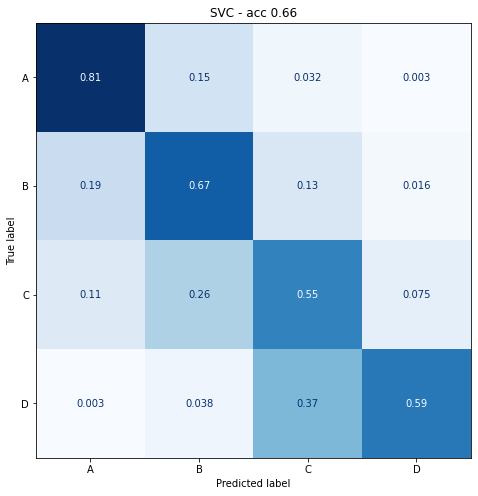

In [68]:
confusion_matrix_plot(svc, y_test_balanced, os_svc_preds, 'SVC')
plt.savefig("img\matriz_svc_os.png", dpi=300, facecolor='white', bbox_inches='tight')

In [68]:
print('Classification Report do SVC com Oversampling:')
print(classification_report(y_test_balanced, os_svc_preds))

Classification Report do SVC com Oversampling:
              precision    recall  f1-score   support

           A       0.73      0.81      0.77     11586
           B       0.60      0.67      0.63     11586
           C       0.51      0.55      0.53     11586
           D       0.86      0.59      0.70     11586

    accuracy                           0.66     46344
   macro avg       0.67      0.66      0.66     46344
weighted avg       0.67      0.66      0.66     46344



In [69]:
dump(svc, 'modelo_svc.joblib')

['modelo_svc.joblib']

##### Random Forest

In [117]:
rf = RandomForestClassifier(random_state = 42)

*Sem Oversampling*

In [118]:
rf.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [119]:
rf_preds = rf.predict(X_test_preprocessed)

In [120]:
rf_accuracy = accuracy_score(y_test, rf_preds)

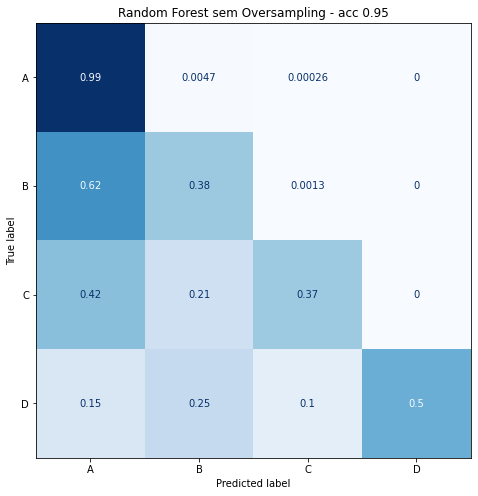

In [121]:
confusion_matrix_plot(rf, y_test, rf_preds, 'Random Forest sem Oversampling')
plt.savefig("img\matriz_rf.png", dpi=300, facecolor='white', bbox_inches='tight')

In [122]:
print('Classification Report do Random Forest sem Oversampling:')
print(classification_report(y_test, rf_preds))

Classification Report do Random Forest sem Oversampling:


              precision    recall  f1-score   support

           A       0.96      0.99      0.98     11586
           B       0.78      0.38      0.51       770
           C       0.87      0.37      0.52       111
           D       1.00      0.50      0.67        20

    accuracy                           0.95     12487
   macro avg       0.90      0.56      0.67     12487
weighted avg       0.94      0.95      0.94     12487



*Com Oversampling*

In [123]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [124]:
os_rf_preds = rf.predict(X_test_balanced)

In [125]:
os_rf_accuracy = accuracy_score(y_test_balanced, os_rf_preds)

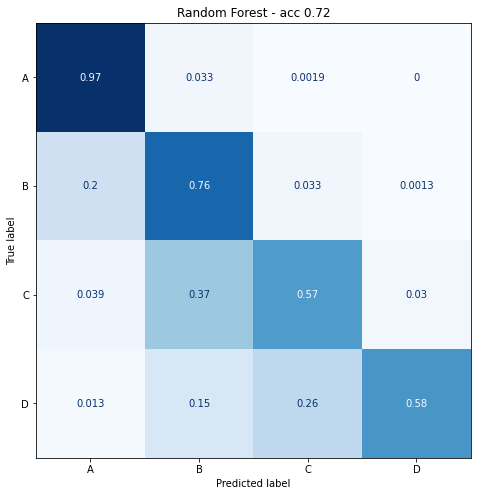

In [126]:
confusion_matrix_plot(rf, y_test_balanced, os_rf_preds, 'Random Forest')
plt.savefig("img\matriz_rf_os.png", dpi=300, facecolor='white', bbox_inches='tight')

In [127]:
print('Classification Report do Random Forest com Oversampling:')
print(classification_report(y_test_balanced, os_rf_preds))

Classification Report do Random Forest com Oversampling:
              precision    recall  f1-score   support

           A       0.79      0.97      0.87     11586
           B       0.58      0.76      0.66     11586
           C       0.66      0.57      0.61     11586
           D       0.95      0.58      0.72     11586

    accuracy                           0.72     46344
   macro avg       0.75      0.72      0.71     46344
weighted avg       0.75      0.72      0.71     46344



In [128]:
dump(rf, 'modelo_rf.joblib')

['modelo_rf.joblib']

### Conclusão

O projeto teve como objetivo analisar e prever a satisfação dos clientes de Airbnb para agências de viagens interessadas.

Para o nosso controle sobre às agência de viagem (nossos cliente), criamos, inicialmente, um modelo conceitual de Banco de Dados com as seguintes entidades: Clientes, Pacotes de Serviço e Análise, seguido por um modelo lógico e físico.

Criamos as tabelas e as preenchemos com valores hipotéticos para a realização das queries. 

Fizemos uma função para conectar o banco de dados à este Notebook por meio do mysql.connector. Assim, foram criadas as 10 queries para uma análise aprofundada e controle dos nossos clientes.

A fim de atingir nosso objetivo, inicialmente, foi realizada uma análise exploratória dos dados, onde foi verificado o tamanho do dataframe, informação das colunas, se haviam valores nulos... Depois foi criada uma nova coluna "Guest Satisfaction_class", onde os valores da coluna (já existente originalmente) "Guest Satisfaction" foram divididos em intervalos para que fossem classificados de A à D, sendo A - muito satisfeito, B - satisfetio, C - insatisfeito e D - muito insatisfeito.

Após essa divisão foi possível observar que os dados estavam desbalanceados, ou seja, a categoria A estava com muitos mais dados do que as outras três. 

Foi criado um mapa para analisar a correlação entre as variáveis. A maioria foi baixa. As que chamaram mais atenção foram:
    
- Guest Satisfaction x Cleanliness Rating
- Guest Satisfaction x Superhost
- Metro Distance x City Center
- Normalised Attraction Index x Normalised Restraunt Index

Depois foram criados os gráficos para analisar essas variáveis e suas relações. 
    
Pudemos observar que conforme a hospedagem fica mais longe do centro da cidade e do metrô, há menos hóspedes. A distância do metrô acaba sendo mais relevante que do centro da cidade, visto que há uma maior concentração, no gráfico "Satisfação do Cliente por: Distância do Centro (km) x Distância do Metrô (km)", próximo ao 0 referente à distância do metrô. A distância do centro da cidade varia, mas nem tanto. Analisando, podemos observar que a satisfação do cliente não é muito influenciada por essas variáveis, visto que há clientes muito satisfeitos tanto próximos, quanto longe do metro e do centro da cidade. O mesmo para clientes muito insatisfeitos. Dessa forma a satisfação do cliente não é muito influenciada por essas distâncias, mas geralmente eles preferem estar próximos ao metrô.

Além disso, para o índice de atração e restaurante, conseguimos observar que conforme o hóspede fica mais longe das atrações, fica mais longe, também, dos restaurantes. A satisfação também não é muito influenciada, já que há bastante clientes muito satisfeitos longe de atrações e restaurantes e clientes muito insatisfeitos perto de atrações e restaurantes.

Analisando a satisfação do cliente de acordo com o tipo de quarto, conseguimos observar uma diferença nas preferências. Geralmente o cliente é mais satisfeito quando está com uma casa/ apartamento inteiro e menos satisfeito quando o quarto é compartilhado, o quarto privado está entre os dois. Isso se justifica, possivelmente, por, ao ter que compartilhar um quarto ou uma casa, o hóspede é influenciado de acordo com as atitudes do outro hóspede presente na casa e, ao ter uma casa inteira, sem compartilhar, não há esse tipo de problema.

Comparando, agora, a satisfação de acordo com a condição de superhost (se é ou não) podemos observar que há uma grande tendência do cliente se sentir mais satisfeito quando o host é superhost. Nesse caso a mediana está mais próxima de 100 e o valor mínimo não é baixo, pelo contrário, é 91, ou seja, a menor satisfação do cliente para um Airbnb quando o host era superhost foi de 91. Quando não é superhost, a mediana está um pouco mais abaixo e o valor mínimo em 75, além de ter mais outliers baixos.

Em relação à limpeza, de forma bem clara, conseguimos observar que a satisfação é maior quando a avaliação para limpeza é mais alta. Isso é de se esperar, já que a limpeza é um grande fator para que um hóspede se sinta confortável no ambiente.

Já em relação ao preço, não é possível observar muitas diferenças. Nesse caso, a categoria C (insatisfeito), foi a que teve a média de preços ligeiramente mais alta do que as outras três categorias.

Essas foram as conclusões das análises das categorias que julgamos mais importantes para avaliar diante do nosso problema de negócio. É importante ressaltar que os dados estavam desbalanceados ao fazer essas análises, portanto a categoria A sempre terá mais valores e com menos padrões.

Depois das análises gráficas, foi iniciado o processo de Machine Learning.

Primeiramente, foram definidas as variáveis preditoras (todas, exceto a coluna original da satisfação dos clientes e a criada posteriormente, das categorias) e a variável-alvo (categoria da satisfação do cliente). Os dados de treino e teste foram divididos e definidos para serem avaliados com 30% dos dados.

Após isso, foi feito um pré-processamento dos dados. Foi utilizado o StandardScaler(), transformando as variáveis numéricas para que tenham média zero e desvio padrão um, tornando-as comparáveis, estando na mesma escala, sem ser afetadas por valores discrepantes (outliers) ou por diferenças nas unidades de medidas. Também foi utilizado o OneHotEncoder(), transformando as variáveis categóricas em colunas binárias, isso faz com que essas variáveis possam ser usadas como recursos para algoritmos de Machine Learning que requerem entradas numéricas. Depois, com o ColumnTransformer() foram aplicadas as transformações às colunas numéricas e categóricas.

Os dados de treinamento e teste foram ajustados. Para os dados de treinamento, o pré-processador aprende os parâmetros necessários para aplicar as tranformações aos dados e depois aplica. Para os dados de teste são aplicadas as mesmas transformações que foram aprendidas nos dados de treinamento.

Depois os dados foram balanceados utilizando Oversampling, onde as classe minoritárias (B, C e D) foram aumentadas de forma que houvesse um equilíbrio na distribuição das classes. Esse processo, utilizando o algoritmo SMOTE, cria amostras sintéticas para as classes minoritárias, com base em amostras já existentes. Isso evita erros no modelo de Machine Learning para que a classe majoritária (A) não seja mais influenciada do que as outras.

Foram treinados 3 classificadores: KNN, SVC e Random Forest.

O KNN tem como objetivo comparar uma nova observação e as demais já treinadas de acordo com os rótulos dos K vizinhos mais próximos.

O SVC faz parte do SVM. O objetivo do SVM é classificar a qual grupo pertence um objeto. Ele divide os grupos distintos e gera um hiperplano, separando-os.

Já a Random Forest é um conjunto de Árvores de Decisão para fazer previsões. Ela divide os dados em conjutno menores, de forma que fiquem em diferentes categorias. Cada árvore é treinada em uma amostra aleatória e as previsão são feitas de acordo com o resultado que mais vezes foi apresentado.

Disponibilizamos os resultados tanto sem oversampling, quanto com oversampling (modelo final), para que pudessem ser expostas as diferenças e mudanças entre cada um. 

| Modelo | Acurácia Final | Precisão Média | Recall Médio | F1-Score Médio
|---|---|---|---|---|
| KNN | 64% | 66% | 64% | 64% |
| SVC | 66% | 67% | 66% | 66% |
| Random Forest | 72% | 75% | 72% | 71% |

Dessa forma, o KNN foi o modelo com piores métricas, o SVC foi ligeiramente melhor e a Random Forest foi a que apresentou melhor desempenho.

Assim, podemos concluir que a Random Forest foi o melhor modelo para o nosso objetivo de negócio: prever a satisfação de clientes do Airbnb. A acurácia indicou que 72% dos casos foram previstos corretamente. Sua precisão indica que 75% das classificação foram corretas. O recall indica que o modelo conseguiu identificar corretamente 72% das instâncias positivas. Já o f1-score indicou um bom equilíbrio entre precisão e recall: 71%.

É importante ressaltar que a satisfação do cliente pode ser afetada por diversos outros fatores, além dos considerados nesse projeto. Seriam interessante futuras análises que complementassem esse trabalho a fim de melhorar a capacidade do nosso modelo.